# Data to Model
# ________________________________________________________________

##
The primary objective is to develop an accurate model that can predict the price of a used car with minimal error.

After pre-processing the data, development of the model and evaluation of its performance using appropriate metrics can begin.

Throughout this notebook, various machine learning techniques, including regression and ensemble methods will be used to identify the best model for our dataset.

By the end of this notebook, we hope to have developed an accurate and robust model that can predict the price of a used car based on its features, providing enough efficiancy for this project to work.

Things generally wished for in models, i.e. the desired outcomes:

- High accuracy: The model should be able to predict the price of a used car with a high degree of accuracy. This means that the predicted price should be close to the actual price of the car.

- Low error: The model should have a low error rate, meaning that the difference between the predicted price and the actual price should be minimal.

- Robustness: The model should be able to handle a variety of inputs and still produce accurate results. It should not be overly sensitive to changes in the input data.

- Interpretable: The model should be able to explain how it arrived at its predictions. This will make it easier to understand and trust the model.

- Scalability: The model should be able to handle large datasets and still produce accurate results in a reasonable amount of time.

- Generalization: The model should be able to generalize to new, unseen data. This means that it should be able to accurately predict the price of a used car that it has never seen before.
# ________________________________________________________________

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import threading
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
car_data = pd.read_csv("datasets/car_data.csv")
car_data.drop(columns=car_data.columns[0], inplace=True)
car_data.head()

,price,year,manufacturer,fuel,odometer,type,paint_color,lat,long,is_fwd
0,15000,2013,ford,gas,128000.0,truck,black,32.5920,-85.5189,0
1,27990,2012,gmc,gas,68696.0,pickup,black,32.5900,-85.4800,0
2,29990,2016,chevrolet,gas,17302.0,pickup,red,32.5900,-85.4800,0
3,27990,2018,nissan,gas,37332.0,pickup,silver,32.5900,-85.4800,0
4,19900,2004,ford,diesel,88000.0,pickup,blue,32.5475,-85.4682,0


## Preprocessing

- One-Hot Encoding the categorical features

- Standard scaling the features

- Performing a train test split. The testing set was set to be 20% of the total data.

In [3]:
encoded = pd.get_dummies(car_data, columns=['manufacturer', 'fuel', 'type', 'paint_color'])
print("One hot encoding the categorical columns leaves us with", encoded.columns.nunique(), "columns.")
print("These are:\n")
for i in encoded.columns:
    print(i)

One hot encoding the categorical columns leaves us with 74 columns.
These are:

price
year
odometer
lat
long
is_fwd
manufacturer_acura
manufacturer_alfa-romeo
manufacturer_audi
manufacturer_bmw
manufacturer_buick
manufacturer_cadillac
manufacturer_chevrolet
manufacturer_chrysler
manufacturer_dodge
manufacturer_fiat
manufacturer_ford
manufacturer_gmc
manufacturer_harley-davidson
manufacturer_honda
manufacturer_hyundai
manufacturer_infiniti
manufacturer_jaguar
manufacturer_jeep
manufacturer_kia
manufacturer_land rover
manufacturer_lexus
manufacturer_lincoln
manufacturer_mazda
manufacturer_mercedes-benz
manufacturer_mercury
manufacturer_mini
manufacturer_mitsubishi
manufacturer_nissan
manufacturer_pontiac
manufacturer_porsche
manufacturer_ram
manufacturer_rover
manufacturer_saturn
manufacturer_subaru
manufacturer_tesla
manufacturer_toyota
manufacturer_volkswagen
manufacturer_volvo
fuel_diesel
fuel_electric
fuel_gas
fuel_hybrid
fuel_other
type_SUV
type_bus
type_convertible
type_coupe
type_

In [4]:
X = StandardScaler().fit_transform(encoded.drop(columns='price'))
y = encoded['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(x_train[0])
print(y_train[0])

[ 6.44311519e-01 -1.85371533e-01 -1.77572411e+00 -1.45376426e-01
 -8.54815893e-01 -1.19005398e-01 -3.16747475e-02 -1.20372317e-01
 -1.89145344e-01 -1.15842178e-01 -1.19338129e-01 -3.74503334e-01
 -1.23103533e-01  5.57272807e+00 -4.80483445e-02 -4.46533312e-01
 -1.85117873e-01 -1.58314186e-02 -2.57727439e-01 -1.88131736e-01
 -1.14510582e-01 -5.46519417e-02 -2.31868741e-01 -1.69834257e-01
 -4.39033766e-03 -1.57317851e-01 -1.00912433e-01 -1.28943773e-01
 -1.54953729e-01 -2.10597855e-02 -9.30131389e-02 -1.01350079e-01
 -2.54801888e-01 -3.81753867e-02 -4.38351130e-02 -1.70733141e-01
 -6.82433313e-02 -3.04309388e-02 -1.56156030e-01 -1.93906637e-02
 -3.18215103e-01 -1.86975409e-01 -7.12432542e-02  5.25738312e+00
 -6.43573514e-02 -2.78901337e+00 -1.39115063e-01 -2.43300667e-01
 -6.05755199e-01 -3.05891702e-02 -1.49182038e-01 -2.13041709e-01
 -2.39297683e-01 -1.21029822e-01 -4.23764731e-02 -1.82314935e-01
 -3.49187583e-01  1.57147134e+00 -3.13825002e-01 -1.79588327e-01
 -2.17258880e-01 -5.25923

## Model Testing

This code block contains the implementation of training three different machine learning models: 
- RandomForestRegressor
- LinearRegression
- Support Vector Regressor 

In [8]:
# rf = RandomForestRegressor()
# lr = LinearRegression()
# svr = SVR()

# models = [(rf, 'Random Forest'), (lr, 'Linear Regression'), (svr, 'Support Vector Regressor')]

# def train_model(model):
#     model[0].fit(X_train, y_train)
#     model[0].accuracy = model[0].score(X_test, y_test)
#     print(f"{model[1]} accuracy: {model[0].accuracy}")

# def train_all_models():
#     s = time.perf_counter()
#     threads = []
#     for model in models:
#         t = threading.Thread(target=train_model, args=(model,))
#         t.start()
#         threads.append(t)
#     for thread in threads:
#         thread.join()
#     elapsed = time.perf_counter() - s
#     print("Elapsed Time: {:.2f} seconds".format(elapsed))



# train_all_models()

Linear Regression accuracy: 0.611768860453906
Random Forest accuracy: 0.8360246932255407
Support Vector Regressor accuracy: 0.07731054571294105
Elapsed Time: 89.45 seconds


### Output
Linear Regression accuracy: 0.611768860453906

Random Forest accuracy: 0.8360246932255407

Support Vector Regressor accuracy: 0.07731054571294105

Elapsed Time: 1120 seconds

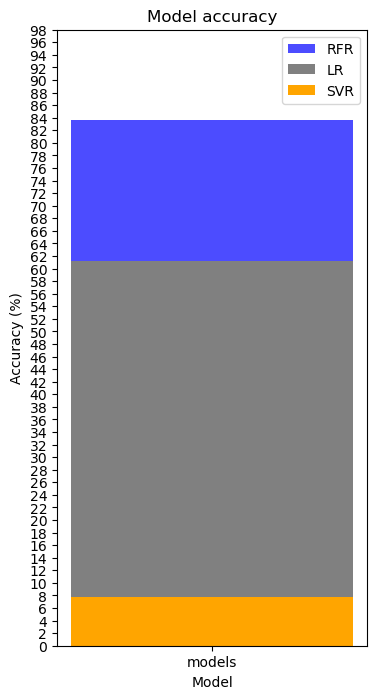

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize = (4, 8))
plt.bar("models", 0.8360246932255407*100, label='RFR', color = 'blue', alpha=0.7)
plt.bar("models", 0.611768860453906*100, label='LR', color = 'grey', alpha=1)
plt.bar("models", 0.07731054571294105*100, label='SVR', color = 'orange', alpha=1)
plt.title('Model accuracy')
plt.xlabel('Model')
plt.yticks(np.arange(0,100, 2))
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
plt.clf()

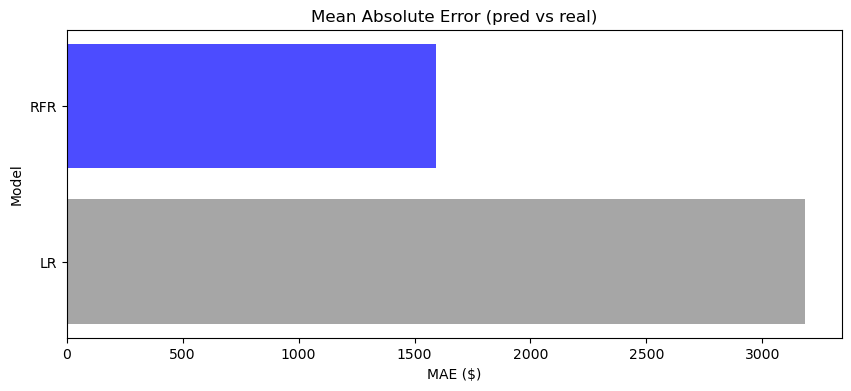

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize = (10, 4))
plt.barh(['LR', 'RFR'], 
        [mean_absolute_error(lr.predict(x_test),y_test), mean_absolute_error(rf.predict(x_test),y_test)],
       color = ['grey', 'blue'], 
        alpha=0.7)
plt.title('Mean Absolute Error (pred vs real)')
plt.ylabel('Model')
plt.xlabel('MAE ($)')
plt.show()
plt.clf()

## Hyperparameter Tuning

In order to improve the performance of our model, we are doing a hyperparameter search for the RandomForestRegressor, which involves tweaking various parameters to find the best combination. This can help us achieve better accuracy and reduce the mean absolute error (MAE).

Used here is the **RandomizedSearchCV** method to perform the search, which uses cross-validation to evaluate the performance of each set of parameters. It also serves well in this case and that way time is saved compared to using grid search. 

The goal is to find the best combination of hyperparameters for the RandomForestRegressor, including the number of trees, maximum tree depth, minimum samples to split a node, minimum samples to be at a leaf node, maximum number of features to consider for each split, and whether to use bootstrap samples.

The search will be based on the negative mean absolute error (-mean_absolute_error) as the scoring metric, which optimally would become smaller.

In [48]:
# rf = RandomForestRegressor()

# param_dist = {
#     'n_estimators': [10, 50, 100, 200, 300],
#     'max_depth': [5, 10, 20, 30, 40, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# random_search = RandomizedSearchCV(
#     rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# random_search.fit(x_train, y_train)

# print("Best hyperparameters:", random_search.best_params_)

# print("Training MAE of best model:", -random_search.best_score_)

# print("Test MAE of best model:", -random_search.score(x_test, y_test))

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Training MAE of best model: 1702.5655726260447
Test MAE of best model: 1609.9200111521297


### Output

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}

Training MAE of best model: 1702.5655726260447

Test MAE of best model: 1609.9200111521297

In [52]:
random_search.best_estimator_.score(x_test, y_test)

0.8453909145112245

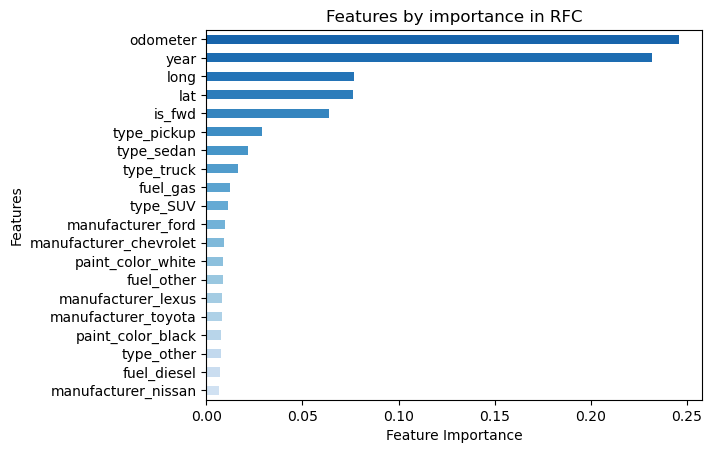

In [65]:
feat_importances = pd.Series(random_search.best_estimator_.feature_importances_, index=encoded.drop(columns='price').columns)
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_top = feat_importances_sorted.nlargest(20)

# Reverse the order of the sorted series
feat_importances_top = feat_importances_top.iloc[::-1]

# Create a custom color scheme using a colormap
colors = plt.cm.Blues(np.linspace(0.2, 0.8, 20))

# Plot the feature importances with the custom colors
feat_importances_top.plot(kind='barh', color=colors)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Features by importance in RFC')

plt.show()

In [59]:
best_params = random_search.best_params_
with open('pipeline/best_params.txt', 'w') as f:
    for param, value in best_params.items():
        f.write(f"{param}: {value}\n")